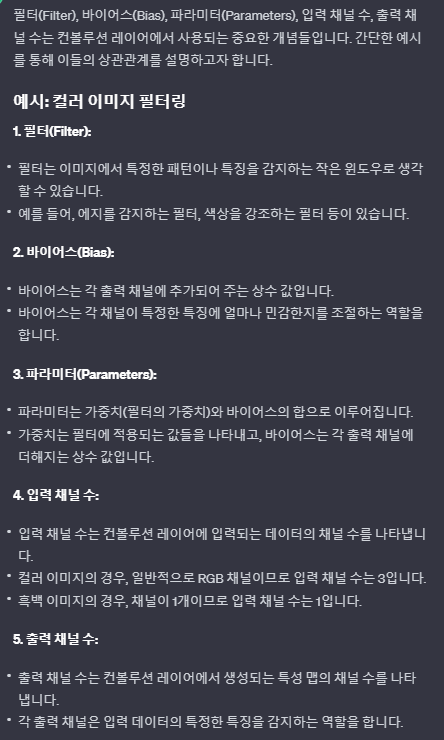

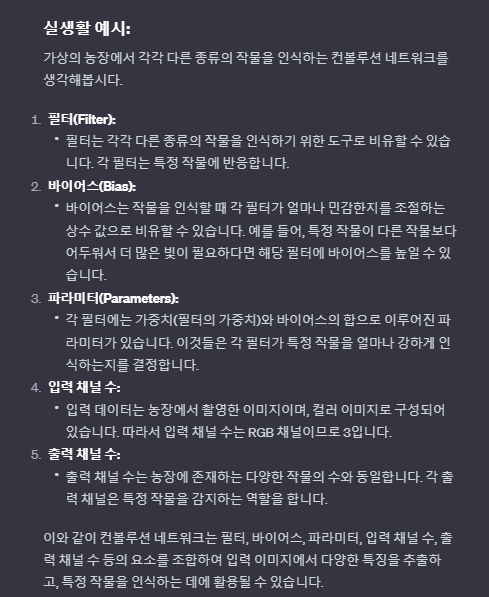

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Activation

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras import datasets
#from tensorflow.keras.datasets import fashion_mnist


In [ ]:
# MNIST 데이터셋에서 훈련 데이터와 레이블, 테스트 데이터와 레이블을 로드합니다.
(X_train, Y_train),(X_test, Y_test)= datasets.fashion_mnist.load_data()

# 훈련 데이터의 형태와 레이블의 형태를 출력합니다.
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


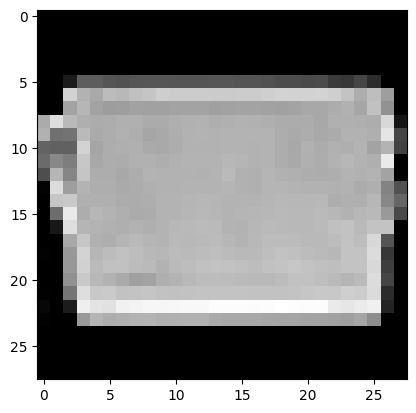

8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0  27  93  93  85  82  85  86  86  85  85  85  86  86  84  84  81
   76  76  73  75  59  55  69  44   0   0]
 [  0   0 210 178 169 188 184 192 197 206 204 204 204 203 203 204 204 207
  211 210 210 211 207 195 173 190 158   0]
 [  0   0 164 182 163 157 158 162 161 161 163 163 163 160 162 163 163 162
  161 164 168 168 172 177 166 193 146   0]
 [171 222 185 175 172 173 176 176 171 171 175 177 178 174 176 

In [ ]:
# 무작위로 선택한 샘플 이미지를 플로팅합니다.
my_sample =np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray') # cmap은 흑백의 경우만
plt.show()
# 선택한 샘플의 레이블과 픽셀 값들을 출력합니다
print(Y_train[my_sample])
print(X_train[my_sample])
# 0~255 : 255가 가장 큰 값


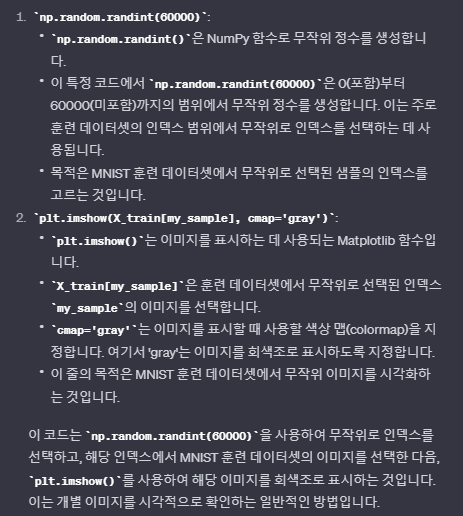

In [ ]:
# to_categorical 함수를 사용하여 레이블을 원-핫 인코딩합니다.
y_train = to_categorical(Y_train)
y_test= to_categorical(Y_test)
# 인코딩된 레이블을 출력합니다.
print(Y_train[5000]) # 5000번 인덱스에 나온 값을 출력
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# 이미지 데이터를 1차원으로 변환합니다.
#x_train = X_train.reshape(-1,28*28)  # reshape 할 필요 없음
#x_test = X_test.reshape(-1,28*28)
# 픽셀 값의 범위를 0~255에서 0~1로 조정합니다.

x_train = X_train / 255.0 # 원본 그대로 이용
x_test = X_test / 255.0
x_train = x_train.reshape(60000, 28,28,1) # 1 color니까 하나를 묶어주는 것.
x_test = x_test.reshape(10000, 28, 28, 1)
# 변환된 데이터의 형태를 출력합니다.
print(x_train.shape)


(60000, 28, 28, 1)


In [ ]:
model = Sequential()
#Sequential 모델을 초기화합니다. Sequential 모델은 레이어를 순차적으로 쌓아 올리는 방식으로 모델을 정의하는데 사용됩니다.

model.add(Conv2D(32, input_shape=(28, 28, 1), activation='relu', kernel_size=(3, 3), padding='same')) # 필터 32개
#첫 번째로 컨볼루션 레이어를 추가합니다. 이 레이어는 32개의 필터를 사용하며,
#각 필터는 크기가 3x3입니다. 입력 이미지의 크기는 (28, 28, 1)로 가정되며, 활성화 함수로는 ReLU를 사용합니다.
#padding='same'은 패딩을 사용하여 입력과 출력의 크기를 동일하게 유지하도록 합니다.
model.add(MaxPooling2D(padding='same', pool_size=(2, 2)))
#MaxPooling 레이어를 추가합니다. 이 레이어는 최대 풀링 연산을 수행하며,
# pool_size=(2, 2)로 설정되어 2x2 크기의 풀링을 수행합니다.
#padding='same'은 패딩을 사용하여 입력과 출력의 크기를 동일하게 유지하도록 합니다.


model.add(Conv2D(32, activation='relu', kernel_size=(3, 3), padding='same'))


model.add(MaxPooling2D(padding='same', pool_size=(2, 2))) # 2*2 에서 큰값을 골라내는 것.
#이후에 다시 한 번 컨볼루션 레이어와 MaxPooling 레이어를 추가합니다. 이전 레이어와 동일한 구조를 가집니다.

model.add(Flatten())# Flatten 을 한줄로 쭉 나열해 주는 것. -> 1568 픽셀을 하나로 쭉 나열해 놓은거야.
# Flatten 레이어를 추가하여 다차원의 특성 맵을 1차원으로 펼치는 작업을 수행합니다.
#이는 컨볼루션 레이어와 풀링 레이어를 거치고 나서 최종적으로 완전 연결 레이어에 전달하기 위해 필요합니다.

model.add(Dropout(0.2))
#Dropout 레이어를 추가하여 모델이 과적합되지 않도록 합니다. 20%의 뉴런을 무작위로 비활성화합니다.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#128개의 뉴런을 가진 완전 연결 레이어를 추가하고 다시 Dropout 레이어를 적용합니다.
model.add(Dense(10, activation='softmax'))
#최종 출력 레이어로 10개의 뉴런을 가지며, 다중 클래스 분류를 위해 softmax 활성화 함수를 사용합니다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dropout (Dropout)           (None, 1568)              0

28* 28 짜리의 이미지 한개가 3* 3 필터 32개를 통과하면 28* 28 이미지가 32개로 늘어남.

28* 28 짜리의 이미지가 3* 3 필터를 통과하면 26* 26으로 줄어들게됨.
크기를 유지하기 위해 바깥쪽을 늘려서 0으로 채워주는데 이게 padding임.
padding을 same으로 주면 입력과 출력을 같게 해줌 즉 둘다 28*28되게 끔 padding함.
그래서 30*30이되서 3* 3 필터통과후 28* 28가 됨.

maxpool은 필터 씌우는거랑 비슷한데 위에 사이즈를 2* 2로 했으니 2* 2 필터로 생각해서 집은 곳 중에 가장큰값을 선택함. 근데 con2v와 다른점은 con2v는 한칸씩 진행되서 중복이 되었는데 maxpool은 중복되지않고 각각 진행해서 2* 2의 경우 크기가 절반으로 줄거임.
그래서 14* 14크기의 이미지가 완성될 거고 총 32개가 될거임.
padding을 same으로 주면 맨끝에 부족한 만큼 채워줘서 maxpool 필터를 적용할 수 있게 끔 해줌. 아래 사진이 maxpool하는거임.

그후에 다시똑같은 과정 반복해 보면 일단 14* 14짜리 이미지가 다시 3* 3짜리 32개가 32개 있으니 즉 14* 14짜리 이미지가 3* 3짜리가 32개가 32세트 만큼의 필터를 통과해서
14 *14짜리 크기가 32만큼의 개수가 생기게 됨. 즉 3* 3짜리가 32개로 14* 14를 이미지 한개를 필터를 씌우고 그런걸 32개의 세트로 한니 14 *14가 32개가 생기는거임. 그후 다시 2* 2를 지나면 7* 7이 됨.

Flatten이거는 reshape 해주는애라고 생각하면 됨.

그래서 7* 7 짜리 32개를 연산하면 7* 7* 32= 1568 이 되는데 1568개의 입력이되어서 128개의 뉴런과 연결되고 그 후에 쭈우욱 진행됨.

젤아래는 두번째 conv2D이거랑 maxpool 진행한거임.

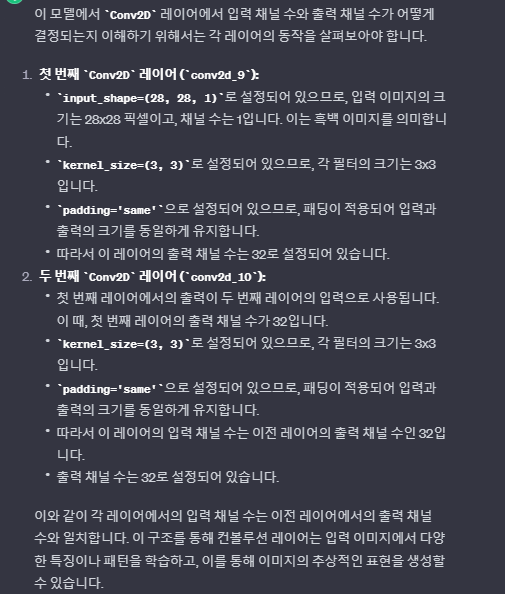

model = Sequential()
model.add(Conv2D(32, input_shape=(28, 28, 1), activation='relu', kernel_size=(3, 3), padding='same'))

- 필터 갯수: 32
- 필터는 각각 다른 종류의 작물을 인식하기 위한 도구
- 각 필터는 특정 작물에 반응함.

- 가중치 개수=필터 크기×입력 채널 수×출력 채널 수
- 바이어스 개수=출력 채널 수
- 총 파라미터 개수=가중치 개수+바이어스 개수


- 바이어스: 특정 작물이 다른 작물보다 어두워서 더 많은 빛이 필요하다면 해당 필터에 바이어스를 높일 수 있다.
- 파라미터: 각 필터가 특정 작물을 얼마나 강하게 인식하는지를 결정함.

- 입력 채널 수: 입력 데이터는 농장에서 촬영한 이미지이며, 컬러 이미지로 구성되어 있습니다. 따라서 입력 채널 수는 RGB 채널이므로 3입니다.
- 출력채널 수: 출력 채널 수는 농장에 존재하는 다양한 작물의 수와 동일합니다. 각 출력 채널은 특정 작물을 감지하는 역할을 합니다.

model.add(MaxPooling2D(padding='same', pool_size=(2, 2)))
model.add(Conv2D(32, activation='relu', kernel_size=(3, 3), padding='same'))
model.add(MaxPooling2D(padding='same', pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

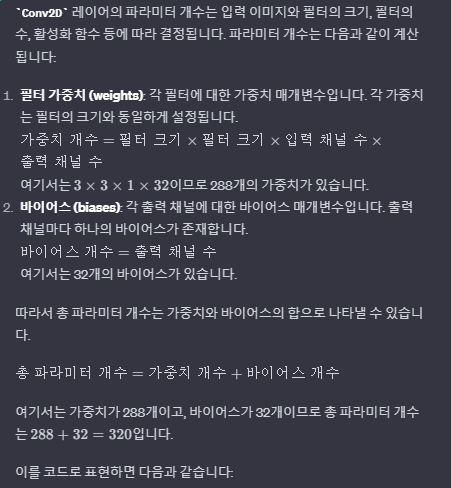

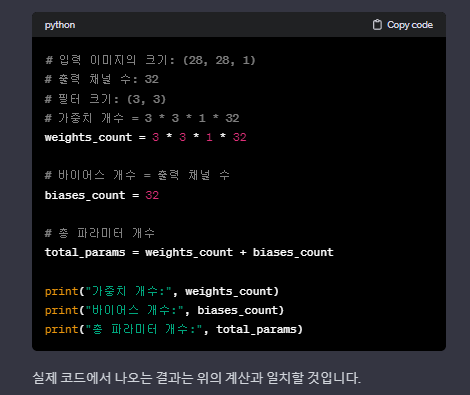

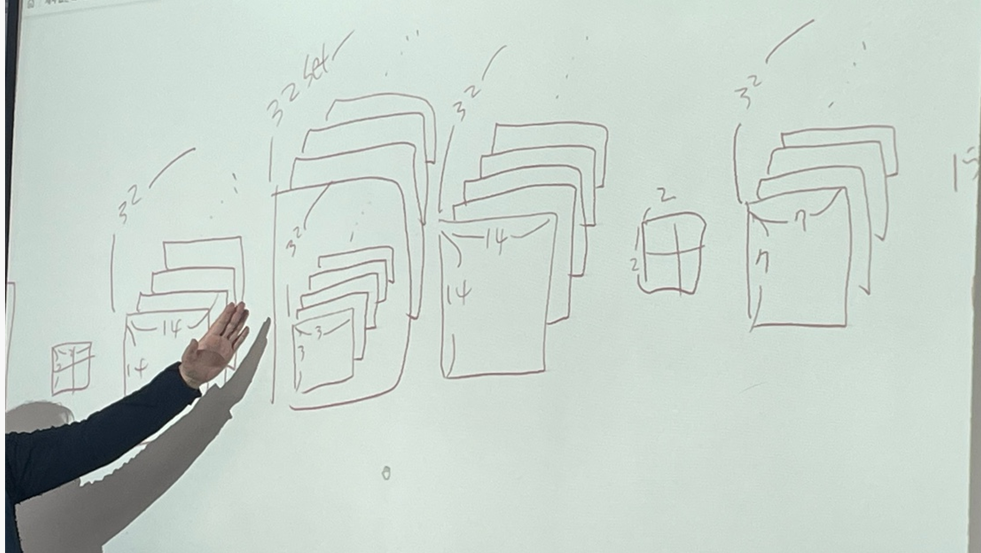

-  conv2d_9 (Conv2D)           (None, 28, 28, 32)        320

(3*3) * 1 *32 = 288 , 288+32 =320
여기서 입력 채널 갯수는 1개 임

- conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248  
(3 * 3) *32 *32 = 9216
여기서 입력 채널의 갯수는 32개임. 그것은 내가 정하는 것.
- dense_6 (Dense)             (None, 128)               200832    
(1568 + 1)*128 =   200832    

-  dense_7 (Dense)             (None, 10)                1290  
(128 * 10) +10 = 1290

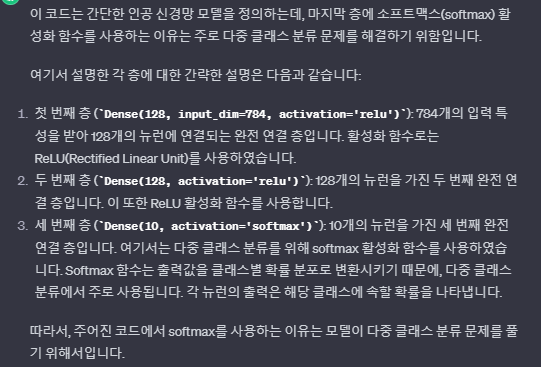

padding은 컨볼루션 연산을 수행할 때 입력 이미지 주변에 가상의 픽셀을 추가하는 것입니다. 'same'으로 설정하면 출력 크기를 입력과 동일하게 유지하도록 패딩이 추가됩니다. 이렇게 함으로써 이미지의 가장자리 부분에서도 중요한 정보를 유지할 수 있습니다.

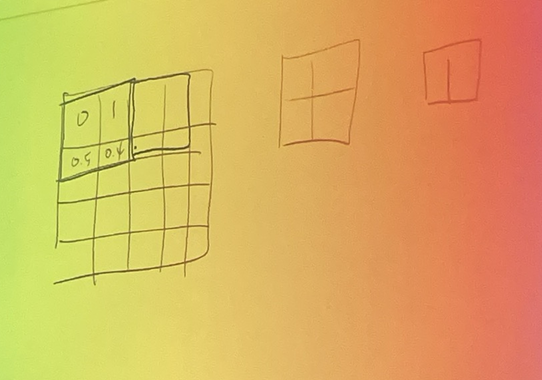

- model.add(MaxPool2D(padding='same', pool_size=(2, 2))) 여기에서 MaxPool을 입력하면, 이 정해진 4칸에서 큰 값을 출력해.
ex) 정해진 4칸: 0,1,0.5,0.4 일때 가장 큰값인 픽셀 1이 출력돼
Maxpool은 4칸씩 일정하게 측정해. 그래서 옆에 남아있는 2칸은계산을 못해, 이를 해결하기 위해 padding sam을 줘.

- padding sam을 주면 한칸 더 확장돼.그래서 다시 4칸씩 maxpool을 통해서 계산 할 수 있어.

- 이렇게 계산하고 나면 이미지 사이즈가 줄어든다.
28*28 에서 14*14로 줄어든다. 이렇게 하면 조금더 특성이 강조돼.
- 입력 이미지가 32장이면 필터도 32개가 만들어져.

In [ ]:
#opt=Adam(learning_rate=0.01)
#model.compile(opt, loss='categorial_crossentropy',metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=256,epochs=15,validation_split=0.2,verbose=1)

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # 'categorical_crossentropy'로 수정

fit_hist=model.fit(x_train, y_train, batch_size=256, epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
188/188 [==============================] - 63s 326ms/step - loss: 0.5139 - accuracy: 0.8119 - val_loss: 0.3299 - val_accuracy: 0.8777
Epoch 2/15
188/188 [==============================] - 44s 233ms/step - loss: 0.3355 - accuracy: 0.8761 - val_loss: 0.2896 - val_accuracy: 0.8928
Epoch 3/15
188/188 [==============================] - 46s 242ms/step - loss: 0.3010 - accuracy: 0.8873 - val_loss: 0.2692 - val_accuracy: 0.9010
Epoch 4/15
188/188 [==============================] - 50s 267ms/step - loss: 0.2764 - accuracy: 0.8972 - val_loss: 0.2657 - val_accuracy: 0.9003
Epoch 5/15
188/188 [==============================] - 47s 252ms/step - loss: 0.2647 - accuracy: 0.8992 - val_loss: 0.2601 - val_accuracy: 0.9013
Epoch 6/15
188/188 [==============================] - 45s 239ms/step - loss: 0.2539 - accuracy: 0.9065 - val_loss: 0.2614 - val_accuracy: 0.9021
Epoch 7/15
188/188 [==============================] - 46s 243ms/step - loss: 0.2400 - accuracy: 0.9086 - val_loss: 0.2515 - val_ac

In [ ]:
score =model.evaluate(x_test,y_test,verbose=0)
print('accuracy',score[1])


accuracy 0.907800018787384


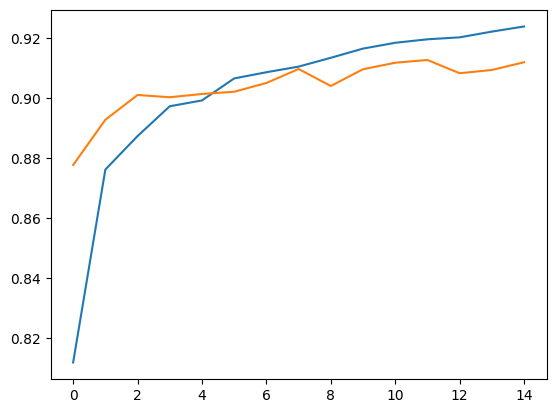

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

pullover
1/1 [==============================] - 0s 108ms/step
[[6.9992681e-04 8.4430452e-10 9.6882445e-01 4.9374921e-06 1.7066887e-03
  1.4811393e-09 2.8754445e-02 4.4340056e-11 9.4193838e-06 6.7695710e-10]]
pullover


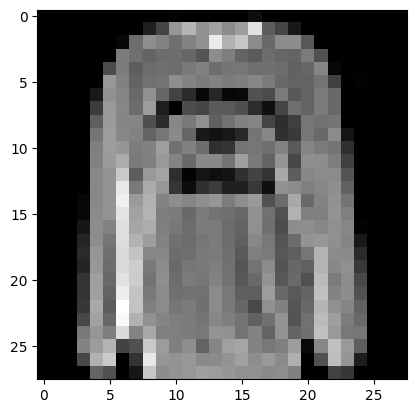

In [ ]:
# # 랜덤한 샘플 선택
# my_sample = np.random.randint(10000)
# # 선택한 샘플 이미지 표시
# plt.imshow(X_test[my_sample], cmap='gray')
# # 선택한 샘플의 실제 레이블 출력
# print(label[Y_test[my_sample]])
# # 모델로 예측 수행
# pred = model.predict(X_test[my_sample].reshape(-1, 784))  # Reshape을 통해 모델에 입력할 수 있도록 변경
# print(pred)
# print(label[np.argmax(pred)])

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28, 28, 1))
print(pred)
print(label[np.argmax(pred)])

http://taewan.kim/post/cnn/

convolution layer 계산하는 법

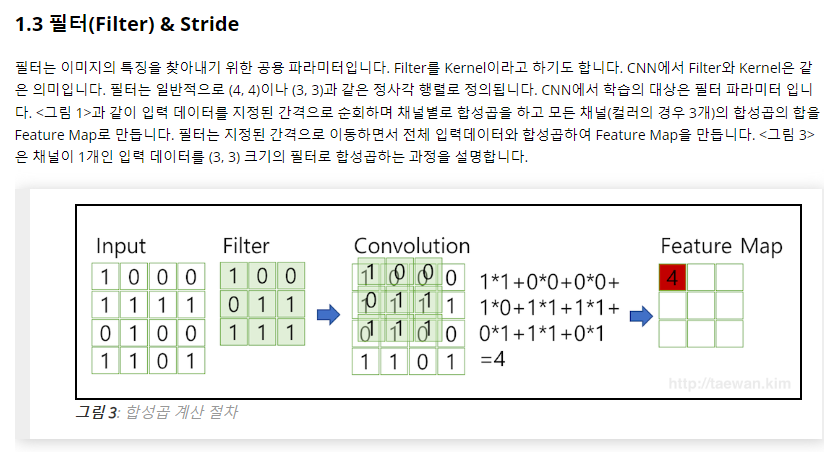

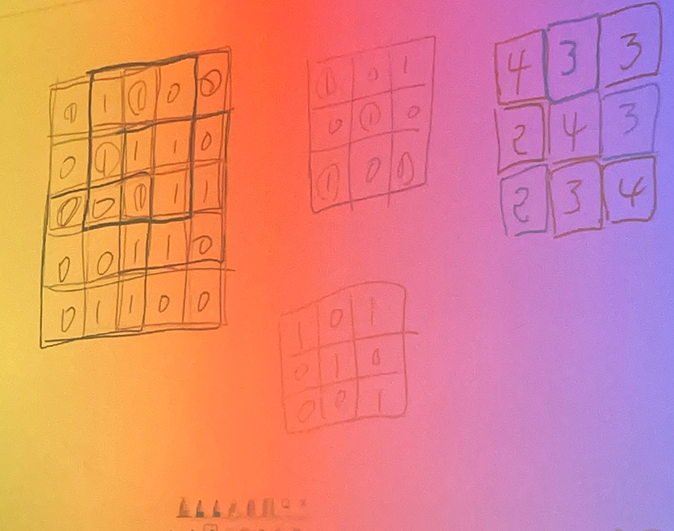

상하좌우로 한 픽셀씩 늘려서 -> 위아래로 늘려 그리고 0으로 채움 -> 이것을 padding 이라해.